In [1]:
import networkx as nx
import numpy as np
from datetime import datetime
from datetime import timedelta
import random
import time

In [2]:
G_0 = nx.Graph()

In [3]:
G_0.add_nodes_from([i for i in range(6)])

In [4]:
edge_list = [
    (0,1,8),
    (1,2,10),
    (2,0,6), 
    (0,3,5),
    (3,4,6),
    (3,5,9),
    (4,5,7),
    (5,0,4)
]

In [5]:
G_0.add_weighted_edges_from(edge_list)

In [6]:
edge_weight_dict = {e: G_0[e[0]][e[1]]['weight'] for e in G_0.edges}
edge_weight_dict

{(0, 1): 8,
 (0, 2): 6,
 (0, 3): 5,
 (0, 5): 4,
 (1, 2): 10,
 (3, 4): 6,
 (3, 5): 9,
 (4, 5): 7}

{(0, 1): Text(-0.43256384024024014, 0.4717825325181899, '8'),
 (0, 2): Text(-0.2636278888249771, 0.6276861542086141, '6'),
 (0, 3): Text(-0.036129493551567665, -0.1529830598196685, '5'),
 (0, 5): Text(0.16972640938081857, -0.0646980190971907, '4'),
 (1, 2): Text(-0.5262258743384203, 0.8440963783095758, '10'),
 (3, 4): Text(0.35649946495760193, -0.7793983592123851, '6'),
 (3, 5): Text(0.30356277055604797, -0.4730533873340873, '9'),
 (4, 5): Text(0.5623553678899882, -0.6911133184899073, '7')}

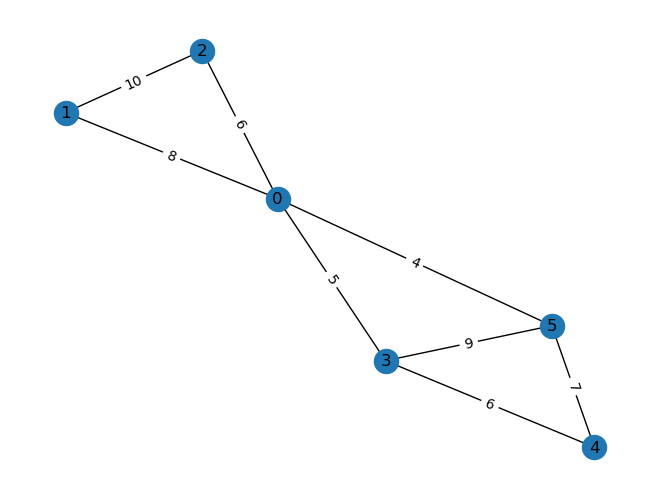

In [7]:
pos=nx.spring_layout(G_0)
labels = {e: G_0[e[0]][e[1]]['weight'] for e in G_0.edges}
nx.draw(G_0,pos, with_labels=True)
nx.draw_networkx_edge_labels(G_0,pos, edge_labels=labels)

In [8]:
[n for n in G_0.neighbors(5)]

[3, 4, 0]

In [9]:
G = nx.DiGraph()

In [10]:
station_timestamp_list = [(0,datetime(2024, 1, 1, 9, 0)),
                                   (0,datetime(2024, 1, 1, 9, 22)),
                                   (0,datetime(2024, 1, 1, 9, 24)),
                                   (1,datetime(2024, 1, 1, 9, 8)),
                                   (2,datetime(2024, 1, 1, 9, 18)),
                                   (3,datetime(2024, 1, 1, 9, 5)),
                                   (4,datetime(2024, 1, 1, 9, 11)),
                                   (5,datetime(2024, 1, 1, 9, 18))]

In [11]:
edge_list  = [(station_timestamp_list[0],station_timestamp_list[1],22),
          (station_timestamp_list[1],station_timestamp_list[2],2),
              
          (station_timestamp_list[0],station_timestamp_list[5],5),
          (station_timestamp_list[5],station_timestamp_list[6],6),
          (station_timestamp_list[6],station_timestamp_list[7],7),
          (station_timestamp_list[7],station_timestamp_list[1],4),
              
          (station_timestamp_list[0],station_timestamp_list[3],8),
          (station_timestamp_list[3],station_timestamp_list[4],10),
          (station_timestamp_list[4],station_timestamp_list[2],6), 
]

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates

In [13]:
G = nx.DiGraph()

In [14]:
for i in range(len(station_timestamp_list)):
    G.add_node(station_timestamp_list[i],pos=( matplotlib.dates.date2num(station_timestamp_list[i][1]),station_timestamp_list[i][0]) )

In [15]:
#G.add_nodes_from(station_timestamp_list)
G.add_weighted_edges_from(edge_list)

In [16]:
pos = nx.get_node_attributes(G,'pos')
pos

{(0, datetime.datetime(2024, 1, 1, 9, 0)): (19723.375, 0),
 (0, datetime.datetime(2024, 1, 1, 9, 22)): (19723.390277777777, 0),
 (0, datetime.datetime(2024, 1, 1, 9, 24)): (19723.391666666666, 0),
 (1, datetime.datetime(2024, 1, 1, 9, 8)): (19723.380555555555, 1),
 (2, datetime.datetime(2024, 1, 1, 9, 18)): (19723.3875, 2),
 (3, datetime.datetime(2024, 1, 1, 9, 5)): (19723.378472222223, 3),
 (4, datetime.datetime(2024, 1, 1, 9, 11)): (19723.38263888889, 4),
 (5, datetime.datetime(2024, 1, 1, 9, 18)): (19723.3875, 5)}

In [17]:
demand_ = (0,7,datetime(2024, 1, 1, 8, 59))

In [18]:
def is_demand_finish(demand_,G):
    nearest_time = datetime(2025, 1, 1, 9, 0)
    nearest_stop = -1
    for node in G.nodes:
        if node[0] == demand_[0] and node[1]<= nearest_time and node[1] >= demand_[2]:
            nearest_stop = node[0]
            nearest_time = node[1]
    nearest_node = (nearest_stop,nearest_time)

    if nearest_stop == -1:
        return False
    
    for node in G.nodes:
        if node[0] == demand_[1] and nx.has_path(G,nearest_node,node):
            return True
    
    return False

In [19]:
is_demand_finish(demand_,G)

False

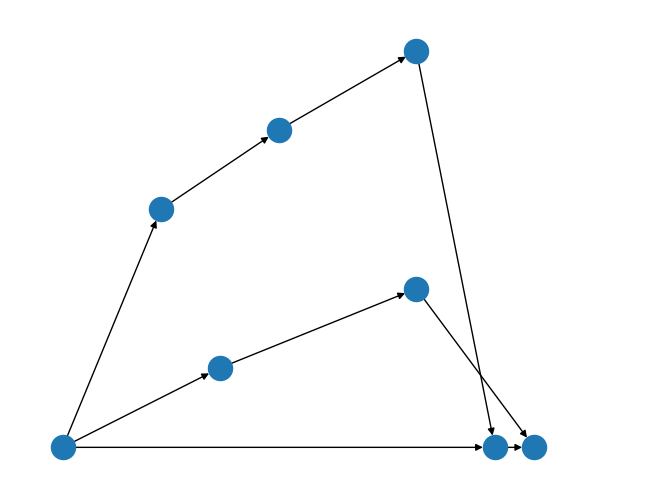

In [20]:
nx.draw(G, pos)

In [21]:
x_1 = np.array([[station_timestamp_list[0][1],station_timestamp_list[0][0]],
       [station_timestamp_list[1][1],station_timestamp_list[1][0]],
       [station_timestamp_list[2][1],station_timestamp_list[2][0]]])

x_2 = np.array([[station_timestamp_list[0][1],station_timestamp_list[0][0]],
       [station_timestamp_list[5][1],station_timestamp_list[5][0]],
       [station_timestamp_list[6][1],station_timestamp_list[6][0]],
       [station_timestamp_list[7][1],station_timestamp_list[7][0]],
       [station_timestamp_list[1][1],station_timestamp_list[1][0]]])

x_3 = np.array([[station_timestamp_list[0][1],station_timestamp_list[0][0]],
       [station_timestamp_list[3][1],station_timestamp_list[3][0]],
       [station_timestamp_list[4][1],station_timestamp_list[4][0]],
       [station_timestamp_list[2][1],station_timestamp_list[2][0]]])

In [22]:
station_timestamp_list = [(1,datetime(2024, 1, 1, 9, 0)),
                                   (1,datetime(2024, 1, 1, 9, 22)),
                                   (1,datetime(2024, 1, 1, 9, 24)),
                                   (2,datetime(2024, 1, 1, 9, 8)),
                                   (3,datetime(2024, 1, 1, 9, 18)),
                                   (4,datetime(2024, 1, 1, 9, 5)),
                                   (5,datetime(2024, 1, 1, 9, 11)),
                                   (6,datetime(2024, 1, 1, 9, 18))]

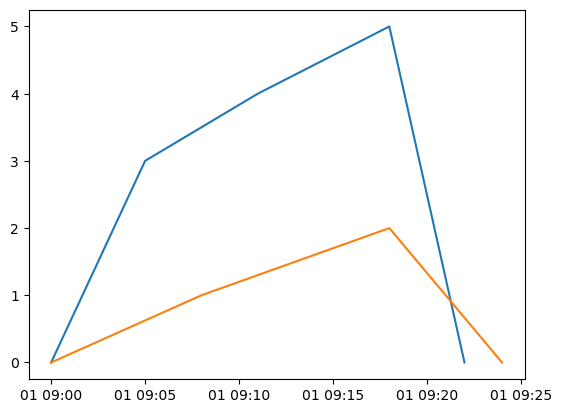

In [23]:
plt.plot(x_2[:,0],x_2[:,1])
plt.plot(x_3[:,0],x_3[:,1])

In [24]:
def current_set_of_actions(bus_stop, G):
    set_of_neighbors  = [neighbor_ for neighbor_ in G.neighbors(bus_stop)]
    
    dict_ = {}
    for neighbor_ in G.neighbors(bus_stop):
        time_ = G[bus_stop][neighbor_]['weight']
        dict_[neighbor_] = time_
    
    return dict_ 

In [25]:
from __future__ import division

import operator
from copy import deepcopy
from functools import reduce

from base import BaseState, BaseAction
from mcts import MCTS

In [26]:
class NaughtsAndCrossesState(BaseState):
    
    playerNames = {1: 'O', -1: 'X'}
    
    
    def __init__(self,G,bus_1,bus_2,demand_set):
        
        self.board = G
        self.currentPlayer = 1
        self.isTerminated = None
        self.reward = 0
        self.possibleActions = None
        self.winingPattern = None
        
        self.bus_1 = bus_1
        
        self.bus_2 = bus_2
        
        self.step = 0
        
        self.demand_set = demand_set
        
        self.advance_time = 0
        self.t_0 = datetime(2024, 1, 1, 9, 0)
        
    def get_current_player(self):
        return self.currentPlayer

    def get_possible_actions(self):
        
        if self.currentPlayer == 1 :
            if self.bus_1[-1][1] <= self.bus_2[-1][1]:
                bus_stop = self.bus_1[-1][0]
                possibleActions = [n for n in G_0.neighbors(bus_stop)]
            else:
                bus_stop = self.bus_2[-1][0]
                possibleActions = [n for n in G_0.neighbors(bus_stop)]
        else:#currentPlayer != 1
            possibleActions = [self.advance_time]
            
        return possibleActions

    def take_action(self, action):
        
        if self.currentPlayer == 1 : 
            newState = deepcopy(self)
            #change to newState
            new_bus_stop = action
            
            if self.bus_1[-1][1] <= self.bus_2[-1][1]:
                bus_stop = self.bus_1[-1][0]
                t_ = G_0[bus_stop][new_bus_stop]['weight']
                new_datatime = self.bus_1[-1][1] + timedelta(minutes=t_)
                newState.bus_1.append((new_bus_stop,new_datatime))
                
                newState.t_0 = self.bus_1[-1][1]
                
                if new_datatime <= self.bus_2[-1][1]:
                    newState.advance_time = t_
                else:
                    newState.advance_time = int((self.bus_2[-1][1] - self.bus_1[-1][1])/timedelta(minutes=1))
                
            else:
                bus_stop = self.bus_2[-1][0]
                t_ = G_0[bus_stop][new_bus_stop]['weight']
                new_datatime = self.bus_2[-1][1] + timedelta(minutes=t_)
                newState.bus_2.append((new_bus_stop,new_datatime))
                
                newState.t_0 = self.bus_2[-1][1]
                
                if new_datatime <= self.bus_1[-1][1]:
                    newState.advance_time = t_
                else:
                    newState.advance_time = int((self.bus_1[-1][1] - self.bus_2[-1][1])/timedelta(minutes=1))
                
            newState.board.add_node( (new_bus_stop,new_datatime), pos = (matplotlib.dates.date2num(new_datatime),new_bus_stop) )
            
            
            newState.board.add_weighted_edges_from([( (bus_stop,newState.t_0),(new_bus_stop,new_datatime),t_)])
            
            near_bus_stop = -1
            near_bus_stop_time = datetime(2024, 1, 1, 9, 0)
            for node in self.board.nodes:
                if node[0] == new_bus_stop and node[1]>=near_bus_stop_time and node[1]<new_datatime:
                    near_bus_stop = node[0]
                    near_bus_stop_time = node[1]
            
            delta_ = int((new_datatime - near_bus_stop_time)/timedelta(minutes=1))
            if near_bus_stop >= 0:
                newState.board.add_weighted_edges_from([( (near_bus_stop,near_bus_stop_time),(new_bus_stop,new_datatime),delta_)])
            
            reward_ = 0
            for demand_ in newState.demand_set:
                if is_demand_finish(demand_,newState.board):
                    newState.demand_set.remove(demand_)
                    reward_ = reward_+1
            newState.reward = newState.reward + reward_
            
            newState.step = newState.step + 1 
            
            print('newState.step',newState.step)
            print('reward_0',newState.reward)

            
        else:
            newState = deepcopy(self)
            ad_time = action
            
            r_ = 0
            for i in range(ad_time):
                delta_ = timedelta(minutes=i)
                original_ , destination_ = random.sample(range(0, 6), 2)
                demand_ = (original_,destination_,self.t_0 + delta_)
                if not is_demand_finish(demand_,self.board):
                    newState.demand_set.append( demand_ )
                    r_ = r_-1
            newState.reward = newState.reward + r_
            
            newState.step = newState.step + 1 
            
            print('newState.step',newState.step)
            print('reward_1',newState.reward)
            
        #change to currentPlayer of newState
        newState.currentPlayer = self.currentPlayer * -1
        return newState

    def is_terminal(self):
        if self.step > 5:
            return True
        else:
            return False

    def get_reward(self):
        return self.reward

In [27]:
# class Action(BaseAction):
#     def __init__(self, player, x, y):
#         self.player = player
#         self.x = x
#         self.y = y

#     def __str__(self):
#         return str((self.x, self.y))

#     def __repr__(self):
#         return str(self)

#     def __eq__(self, other):
#         return self.__class__ == other.__class__ and self.x == other.x and self.y == other.y and self.player == other.player

#     def __hash__(self):
#         return hash((self.x, self.y, self.player))

In [28]:
bus_1 = [(0,datetime(2024, 1, 1, 9, 0)),
        (3,datetime(2024, 1, 1, 9, 5)),
        (4,datetime(2024, 1, 1, 9, 11)),
        (5,datetime(2024, 1, 1, 9, 18)),
        (0,datetime(2024, 1, 1, 9, 22))]
        
bus_2 = [(0,datetime(2024, 1, 1, 9, 0)),
        (1,datetime(2024, 1, 1, 9, 8)),
        (2,datetime(2024, 1, 1, 9, 18)),
        (0,datetime(2024, 1, 1, 9, 24))]

demand_set = []
for i in range(22):
    original_ , destination_ = random.sample(range(0, 6), 2)
    demand_ = (original_,destination_,datetime(2024, 1, 1, 9, i))
    if not is_demand_finish(demand_,G):
        demand_set.append( demand_ )

In [29]:
def get_next_action(G,bus_1,bus_2,demand_set):
    initial_state = NaughtsAndCrossesState(deepcopy(G),bus_1,bus_2,demand_set)
    searcher = MCTS(iteration_limit=1000)
    action = searcher.search(initial_state=initial_state)
    return action

In [ ]:
t_1 = time.time()

set_len = []
for _ in range(10):
    
    action = get_next_action(G,bus_1,bus_2,demand_set)
    print(action)
    state_0 = NaughtsAndCrossesState(deepcopy(G),bus_1,bus_2,demand_set)

    state_1 = state_0.take_action(action)

    state_2 = state_1.take_action(action)

    G = deepcopy(state_2.board)
    bus_1 = deepcopy(state_2.bus_1)
    bus_2 = deepcopy(state_2.bus_2)
    demand_set = deepcopy(state_2.demand_set)
    set_len.append( len(demand_set) )

newState.step 1
reward_0 1
newState.step 2
reward_1 -1
newState.step 3
reward_0 0
newState.step 4
reward_1 -6
newState.step 5
reward_0 -6
newState.step 6
reward_1 -8
newState.step 7
reward_0 -8
newState.step 8
reward_1 -14
newState.step 9
reward_0 -11
newState.step 10
reward_1 -13
newState.step 11
reward_0 -10
newState.step 1
reward_0 0
newState.step 2
reward_1 -2
newState.step 3
reward_0 0
newState.step 4
reward_1 -4
newState.step 5
reward_0 -4
newState.step 6
reward_1 -8
newState.step 7
reward_0 -7
newState.step 8
reward_1 -12
newState.step 9
reward_0 -11
newState.step 10
reward_1 -13
newState.step 11
reward_0 -9
newState.step 1
reward_0 2
newState.step 2
reward_1 0
newState.step 3
reward_0 2
newState.step 4
reward_1 -1
newState.step 5
reward_0 2
newState.step 6
reward_1 1
newState.step 7
reward_0 4
newState.step 8
reward_1 -4
newState.step 9
reward_0 -1
newState.step 10
reward_1 -2
newState.step 11
reward_0 -2
newState.step 1
reward_0 2
newState.step 2
reward_1 0
newState.step 3
rew

newState.step 15
reward_0 -2
newState.step 16
reward_1 -8
newState.step 7
reward_0 4
newState.step 8
reward_1 0
newState.step 9
reward_0 2
newState.step 10
reward_1 -2
newState.step 11
reward_0 -2
newState.step 12
reward_1 -3
newState.step 13
reward_0 -2
newState.step 14
reward_1 -5
newState.step 15
reward_0 -5
newState.step 16
reward_1 -10
newState.step 7
reward_0 2
newState.step 8
reward_1 -2
newState.step 9
reward_0 -1
newState.step 10
reward_1 -3
newState.step 11
reward_0 0
newState.step 12
reward_1 -4
newState.step 13
reward_0 2
newState.step 14
reward_1 -1
newState.step 15
reward_0 0
newState.step 16
reward_1 -2
newState.step 7
reward_0 2
newState.step 8
reward_1 -2
newState.step 9
reward_0 -1
newState.step 10
reward_1 -3
newState.step 11
reward_0 -2
newState.step 12
reward_1 -7
newState.step 13
reward_0 -5
newState.step 14
reward_1 -6
newState.step 15
reward_0 -6
newState.step 16
reward_1 -9
newState.step 7
reward_0 5
newState.step 8
reward_1 1
newState.step 9
reward_0 2
newStat

newState.step 13
reward_0 0
newState.step 14
reward_1 -7
newState.step 15
reward_0 -7
newState.step 16
reward_1 -10
newState.step 7
reward_0 4
newState.step 8
reward_1 3
newState.step 9
reward_0 5
newState.step 10
reward_1 -3
newState.step 11
reward_0 -3
newState.step 12
reward_1 -3
newState.step 13
reward_0 0
newState.step 14
reward_1 -6
newState.step 15
reward_0 -4
newState.step 16
reward_1 -7
newState.step 7
reward_0 4
newState.step 8
reward_1 4
newState.step 9
reward_0 4
newState.step 10
reward_1 0
newState.step 11
reward_0 2
newState.step 12
reward_1 -2
newState.step 13
reward_0 0
newState.step 14
reward_1 -3
newState.step 15
reward_0 -3
newState.step 16
reward_1 -9
newState.step 7
reward_0 4
newState.step 8
reward_1 3
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 -1
newState.step 12
reward_1 -5
newState.step 13
reward_0 -3
newState.step 14
reward_1 -3
newState.step 15
reward_0 -1
newState.step 16
reward_1 -6
newState.step 7
reward_0 2
newState.

newState.step 11
reward_0 0
newState.step 12
reward_1 0
newState.step 13
reward_0 2
newState.step 14
reward_1 -5
newState.step 15
reward_0 -3
newState.step 16
reward_1 -6
newState.step 7
reward_0 2
newState.step 8
reward_1 1
newState.step 9
reward_0 2
newState.step 10
reward_1 -3
newState.step 11
reward_0 0
newState.step 12
reward_1 0
newState.step 13
reward_0 0
newState.step 14
reward_1 -6
newState.step 15
reward_0 -4
newState.step 16
reward_1 -7
newState.step 7
reward_0 2
newState.step 8
reward_1 1
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 0
newState.step 12
reward_1 -1
newState.step 13
reward_0 -1
newState.step 14
reward_1 -7
newState.step 15
reward_0 -6
newState.step 16
reward_1 -8
newState.step 7
reward_0 4
newState.step 8
reward_1 3
newState.step 9
reward_0 5
newState.step 10
reward_1 1
newState.step 11
reward_0 2
newState.step 12
reward_1 2
newState.step 13
reward_0 6
newState.step 14
reward_1 -1
newState.step 15
reward_0 0
newState.step 1

newState.step 13
reward_0 0
newState.step 14
reward_1 -6
newState.step 15
reward_0 -5
newState.step 16
reward_1 -6
newState.step 7
reward_0 4
newState.step 8
reward_1 3
newState.step 9
reward_0 3
newState.step 10
reward_1 -3
newState.step 11
reward_0 -3
newState.step 12
reward_1 -5
newState.step 13
reward_0 -4
newState.step 14
reward_1 -8
newState.step 15
reward_0 -8
newState.step 16
reward_1 -13
newState.step 7
reward_0 4
newState.step 8
reward_1 3
newState.step 9
reward_0 5
newState.step 10
reward_1 -3
newState.step 11
reward_0 -2
newState.step 12
reward_1 -2
newState.step 13
reward_0 0
newState.step 14
reward_1 -7
newState.step 15
reward_0 -7
newState.step 16
reward_1 -8
newState.step 7
reward_0 2
newState.step 8
reward_1 1
newState.step 9
reward_0 3
newState.step 10
reward_1 -2
newState.step 11
reward_0 -2
newState.step 12
reward_1 -5
newState.step 13
reward_0 -5
newState.step 14
reward_1 -8
newState.step 15
reward_0 -3
newState.step 16
reward_1 -10
newState.step 7
reward_0 4
newSt

newState.step 5
reward_0 3
newState.step 6
reward_1 -1
newState.step 7
reward_0 2
newState.step 8
reward_1 -3
newState.step 9
reward_0 0
newState.step 10
reward_1 -1
newState.step 11
reward_0 0
newState.step 12
reward_1 -3
newState.step 13
reward_0 -2
newState.step 3
reward_0 2
newState.step 4
reward_1 -1
newState.step 5
reward_0 2
newState.step 6
reward_1 1
newState.step 7
reward_0 4
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 0
newState.step 11
reward_0 1
newState.step 12
reward_1 -3
newState.step 13
reward_0 1
newState.step 4
reward_1 -1
newState.step 5
reward_0 2
newState.step 6
reward_1 1
newState.step 7
reward_0 3
newState.step 8
reward_1 -5
newState.step 9
reward_0 -4
newState.step 10
reward_1 -4
newState.step 11
reward_0 -2
newState.step 12
reward_1 -11
newState.step 13
reward_0 -7
newState.step 14
reward_1 -8
newState.step 4
reward_1 0
newState.step 5
reward_0 1
newState.step 6
reward_1 -3
newState.step 7
reward_0 -1
newState.step 8
reward_1

newState.step 11
reward_0 -3
newState.step 12
reward_1 -3
newState.step 13
reward_0 -3
newState.step 14
reward_1 -9
newState.step 15
reward_0 -6
newState.step 16
reward_1 -9
newState.step 7
reward_0 -1
newState.step 8
reward_1 -3
newState.step 9
reward_0 0
newState.step 10
reward_1 -4
newState.step 11
reward_0 0
newState.step 12
reward_1 -3
newState.step 13
reward_0 -3
newState.step 14
reward_1 -5
newState.step 15
reward_0 -1
newState.step 16
reward_1 -8
newState.step 7
reward_0 1
newState.step 8
reward_1 0
newState.step 9
reward_0 4
newState.step 10
reward_1 0
newState.step 11
reward_0 1
newState.step 12
reward_1 0
newState.step 13
reward_0 1
newState.step 14
reward_1 -2
newState.step 15
reward_0 -1
newState.step 16
reward_1 -3
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 2
newState.step 12
reward_1 0
newState.step 13
reward_0 1
newState.step 14
reward_1 -3
newState.step 15
reward_0 -2
newState

newState.step 11
reward_0 0
newState.step 12
reward_1 0
newState.step 13
reward_0 1
newState.step 14
reward_1 -4
newState.step 15
reward_0 -1
newState.step 16
reward_1 -5
newState.step 7
reward_0 1
newState.step 8
reward_1 0
newState.step 9
reward_0 3
newState.step 10
reward_1 -2
newState.step 11
reward_0 0
newState.step 12
reward_1 -3
newState.step 13
reward_0 -3
newState.step 14
reward_1 -5
newState.step 15
reward_0 0
newState.step 16
reward_1 -4
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 -1
newState.step 10
reward_1 -6
newState.step 11
reward_0 -6
newState.step 12
reward_1 -7
newState.step 13
reward_0 -6
newState.step 14
reward_1 -10
newState.step 15
reward_0 -7
newState.step 16
reward_1 -7
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 2
newState.step 10
reward_1 -4
newState.step 11
reward_0 -2
newState.step 12
reward_1 -4
newState.step 13
reward_0 -3
newState.step 14
reward_1 -5
newState.step 15
reward_0 -4
newS

newState.step 7
reward_0 1
newState.step 8
reward_1 0
newState.step 9
reward_0 2
newState.step 10
reward_1 -3
newState.step 11
reward_0 -1
newState.step 12
reward_1 -2
newState.step 13
reward_0 2
newState.step 14
reward_1 -2
newState.step 15
reward_0 -1
newState.step 16
reward_1 -6
newState.step 7
reward_0 1
newState.step 8
reward_1 0
newState.step 9
reward_0 4
newState.step 10
reward_1 0
newState.step 11
reward_0 1
newState.step 12
reward_1 0
newState.step 13
reward_0 1
newState.step 14
reward_1 -4
newState.step 15
reward_0 -4
newState.step 16
reward_1 -7
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 0
newState.step 10
reward_1 -5
newState.step 11
reward_0 -3
newState.step 12
reward_1 -4
newState.step 13
reward_0 -2
newState.step 14
reward_1 -6
newState.step 15
reward_0 -3
newState.step 16
reward_1 -4
newState.step 7
reward_0 1
newState.step 8
reward_1 0
newState.step 9
reward_0 3
newState.step 10
reward_1 -2
newState.step 11
reward_0 0
newState.step 

newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 -1
newState.step 10
reward_1 -6
newState.step 11
reward_0 -2
newState.step 12
reward_1 -3
newState.step 13
reward_0 -3
newState.step 14
reward_1 -10
newState.step 15
reward_0 -7
newState.step 16
reward_1 -8
newState.step 7
reward_0 1
newState.step 8
reward_1 0
newState.step 9
reward_0 1
newState.step 10
reward_1 -4
newState.step 11
reward_0 0
newState.step 12
reward_1 -1
newState.step 13
reward_0 3
newState.step 14
reward_1 -5
newState.step 15
reward_0 -3
newState.step 16
reward_1 -5
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 0
newState.step 12
reward_1 -2
newState.step 13
reward_0 -2
newState.step 14
reward_1 -4
newState.step 15
reward_0 0
newState.step 16
reward_1 -5
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 2
newState.step 10
reward_1 -4
newState.step 11
reward_0 -3
newState

newState.step 13
reward_0 -1
newState.step 14
reward_1 -5
newState.step 15
reward_0 -3
newState.step 16
reward_1 -4
newState.step 7
reward_0 1
newState.step 8
reward_1 0
newState.step 9
reward_0 4
newState.step 10
reward_1 0
newState.step 11
reward_0 2
newState.step 12
reward_1 1
newState.step 13
reward_0 2
newState.step 14
reward_1 -1
newState.step 15
reward_0 0
newState.step 16
reward_1 -3
newState.step 7
reward_0 1
newState.step 8
reward_1 0
newState.step 9
reward_0 3
newState.step 10
reward_1 -2
newState.step 11
reward_0 2
newState.step 12
reward_1 -1
newState.step 13
reward_0 1
newState.step 14
reward_1 -5
newState.step 15
reward_0 -4
newState.step 16
reward_1 -8
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 2
newState.step 12
reward_1 0
newState.step 13
reward_0 2
newState.step 14
reward_1 -3
newState.step 15
reward_0 -3
newState.step 16
reward_1 -6
newState.step 7
reward_0 1
newState.step 

newState.step 9
reward_0 1
newState.step 10
reward_1 -4
newState.step 11
reward_0 -2
newState.step 12
reward_1 -3
newState.step 13
reward_0 1
newState.step 14
reward_1 -4
newState.step 15
reward_0 -3
newState.step 16
reward_1 -8
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 1
newState.step 12
reward_1 -1
newState.step 13
reward_0 0
newState.step 14
reward_1 -4
newState.step 15
reward_0 -2
newState.step 16
reward_1 -3
newState.step 7
reward_0 1
newState.step 8
reward_1 0
newState.step 9
reward_0 3
newState.step 10
reward_1 -2
newState.step 11
reward_0 0
newState.step 12
reward_1 -3
newState.step 13
reward_0 -3
newState.step 14
reward_1 -6
newState.step 15
reward_0 -1
newState.step 16
reward_1 -6
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 1
newState.step 10
reward_1 -5
newState.step 11
reward_0 -2
newState.step 12
reward_1 -2
newState.step 13
reward_0 2
newState

newState.step 13
reward_0 -2
newState.step 14
reward_1 -9
newState.step 15
reward_0 -6
newState.step 16
reward_1 -7
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 1
newState.step 12
reward_1 -1
newState.step 13
reward_0 -1
newState.step 14
reward_1 -3
newState.step 15
reward_0 1
newState.step 16
reward_1 -1
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 0
newState.step 10
reward_1 -6
newState.step 11
reward_0 -5
newState.step 12
reward_1 -5
newState.step 13
reward_0 -5
newState.step 14
reward_1 -9
newState.step 15
reward_0 -6
newState.step 16
reward_1 -8
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 1
newState.step 10
reward_1 -5
newState.step 11
reward_0 -1
newState.step 12
reward_1 -1
newState.step 13
reward_0 -1
newState.step 14
reward_1 -7
newState.step 15
reward_0 -5
newState.step 16
reward_1 -8
newState.step 7
reward_0 0
newS

newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 1
newState.step 12
reward_1 -1
newState.step 13
reward_0 0
newState.step 14
reward_1 -7
newState.step 15
reward_0 -6
newState.step 16
reward_1 -8
newState.step 7
reward_0 1
newState.step 8
reward_1 0
newState.step 9
reward_0 3
newState.step 10
reward_1 -2
newState.step 11
reward_0 2
newState.step 12
reward_1 -1
newState.step 13
reward_0 0
newState.step 14
reward_1 -6
newState.step 15
reward_0 -3
newState.step 16
reward_1 -5
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 0
newState.step 10
reward_1 -6
newState.step 11
reward_0 -3
newState.step 12
reward_1 -3
newState.step 13
reward_0 -2
newState.step 14
reward_1 -8
newState.step 15
reward_0 -2
newState.step 16
reward_1 -5
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 0
newState.step 10
reward_1 -6
newState.step 11
reward_0 -5
newState.step 12
reward_1 -5
newState.step 13
reward_0 -1
newStat

newState.step 9
reward_0 3
newState.step 10
reward_1 -2
newState.step 11
reward_0 2
newState.step 12
reward_1 -1
newState.step 13
reward_0 1
newState.step 14
reward_1 -5
newState.step 15
reward_0 -4
newState.step 16
reward_1 -8
newState.step 7
reward_0 1
newState.step 8
reward_1 0
newState.step 9
reward_0 4
newState.step 10
reward_1 0
newState.step 11
reward_0 3
newState.step 12
reward_1 2
newState.step 13
reward_0 3
newState.step 14
reward_1 -3
newState.step 15
reward_0 -2
newState.step 16
reward_1 -5
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 0
newState.step 12
reward_1 -2
newState.step 13
reward_0 -2
newState.step 14
reward_1 -4
newState.step 15
reward_0 -2
newState.step 16
reward_1 -4
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 0
newState.step 10
reward_1 -6
newState.step 11
reward_0 -6
newState.step 12
reward_1 -6
newState.step 13
reward_0 -6
newState.s

newState.step 5
reward_0 -2
newState.step 6
reward_1 -3
newState.step 7
reward_0 1
newState.step 8
reward_1 -4
newState.step 9
reward_0 -2
newState.step 10
reward_1 -4
newState.step 11
reward_0 -3
newState.step 12
reward_1 -5
newState.step 13
reward_0 -3
newState.step 14
reward_1 -8
newState.step 15
reward_0 -6
newState.step 6
reward_1 -3
newState.step 7
reward_0 1
newState.step 8
reward_1 -5
newState.step 9
reward_0 -3
newState.step 10
reward_1 -5
newState.step 11
reward_0 -4
newState.step 12
reward_1 -6
newState.step 13
reward_0 -5
newState.step 14
reward_1 -11
newState.step 15
reward_0 -9
newState.step 16
reward_1 -11
newState.step 5
reward_0 2
newState.step 6
reward_1 -3
newState.step 7
reward_0 -2
newState.step 8
reward_1 -5
newState.step 9
reward_0 -5
newState.step 10
reward_1 -8
newState.step 11
reward_0 -8
newState.step 12
reward_1 -14
newState.step 13
reward_0 -14
newState.step 14
reward_1 -15
newState.step 15
reward_0 -14
newState.step 7
reward_0 -3
newState.step 8
reward_1 -

newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 -2
newState.step 10
reward_1 -4
newState.step 11
reward_0 -3
newState.step 12
reward_1 -5
newState.step 13
reward_0 -5
newState.step 14
reward_1 -7
newState.step 15
reward_0 -2
newState.step 16
reward_1 -4
newState.step 7
reward_0 -1
newState.step 8
reward_1 -6
newState.step 9
reward_0 -1
newState.step 10
reward_1 -2
newState.step 11
reward_0 -2
newState.step 12
reward_1 -5
newState.step 13
reward_0 -2
newState.step 14
reward_1 -5
newState.step 15
reward_0 -3
newState.step 16
reward_1 -9
newState.step 7
reward_0 -1
newState.step 8
reward_1 -6
newState.step 9
reward_0 -2
newState.step 10
reward_1 -3
newState.step 11
reward_0 -3
newState.step 12
reward_1 -6
newState.step 13
reward_0 -6
newState.step 14
reward_1 -9
newState.step 15
reward_0 -7
newState.step 16
reward_1 -11
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 2
newState.step 10
reward_1 0
newState.step 11
reward_0 1
n

newState.step 7
reward_0 0
newState.step 8
reward_1 -5
newState.step 9
reward_0 -1
newState.step 10
reward_1 -4
newState.step 11
reward_0 -3
newState.step 12
reward_1 -5
newState.step 13
reward_0 -3
newState.step 14
reward_1 -8
newState.step 15
reward_0 -6
newState.step 16
reward_1 -8
newState.step 7
reward_0 0
newState.step 8
reward_1 -6
newState.step 9
reward_0 -3
newState.step 10
reward_1 -6
newState.step 11
reward_0 -5
newState.step 12
reward_1 -7
newState.step 13
reward_0 -6
newState.step 14
reward_1 -10
newState.step 15
reward_0 -6
newState.step 16
reward_1 -9
newState.step 7
reward_0 0
newState.step 8
reward_1 -7
newState.step 9
reward_0 -5
newState.step 10
reward_1 -7
newState.step 11
reward_0 -6
newState.step 12
reward_1 -13
newState.step 13
reward_0 -13
newState.step 14
reward_1 -15
newState.step 15
reward_0 -15
newState.step 16
reward_1 -22
newState.step 6
reward_1 -6
newState.step 7
reward_0 -5
newState.step 8
reward_1 -5
newState.step 9
reward_0 -2
newState.step 10
reward_

newState.step 11
reward_0 -2
newState.step 12
reward_1 -5
newState.step 13
reward_0 -5
newState.step 14
reward_1 -9
newState.step 15
reward_0 -7
newState.step 16
reward_1 -9
newState.step 7
reward_0 3
newState.step 8
reward_1 -1
newState.step 9
reward_0 0
newState.step 10
reward_1 -2
newState.step 11
reward_0 0
newState.step 12
reward_1 -4
newState.step 13
reward_0 1
newState.step 14
reward_1 -4
newState.step 15
reward_0 -2
newState.step 16
reward_1 -7
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 -2
newState.step 10
reward_1 -4
newState.step 11
reward_0 -4
newState.step 12
reward_1 -6
newState.step 13
reward_0 -1
newState.step 14
reward_1 -6
newState.step 15
reward_0 -5
newState.step 16
reward_1 -9
newState.step 7
reward_0 3
newState.step 8
reward_1 -1
newState.step 9
reward_0 1
newState.step 10
reward_1 -1
newState.step 11
reward_0 1
newState.step 12
reward_1 -2
newState.step 13
reward_0 -1
newState.step 14
reward_1 -2
newState.step 15
reward_0 3
new

newState.step 15
reward_0 -7
newState.step 16
reward_1 -10
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 2
newState.step 10
reward_1 0
newState.step 11
reward_0 1
newState.step 12
reward_1 -3
newState.step 13
reward_0 -1
newState.step 14
reward_1 -3
newState.step 15
reward_0 -2
newState.step 16
reward_1 -6
newState.step 7
reward_0 -1
newState.step 8
reward_1 -6
newState.step 9
reward_0 -2
newState.step 10
reward_1 -3
newState.step 11
reward_0 -3
newState.step 12
reward_1 -6
newState.step 13
reward_0 -4
newState.step 14
reward_1 -7
newState.step 15
reward_0 -7
newState.step 16
reward_1 -8
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 0
newState.step 10
reward_1 -2
newState.step 11
reward_0 -2
newState.step 12
reward_1 -5
newState.step 13
reward_0 -5
newState.step 14
reward_1 -6
newState.step 15
reward_0 -3
newState.step 16
reward_1 -8
newState.step 7
reward_0 -1
newState.step 8
reward_1 -6
newState.step 9
reward_0 -4
ne

newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 -2
newState.step 10
reward_1 -4
newState.step 11
reward_0 -4
newState.step 12
reward_1 -6
newState.step 13
reward_0 -6
newState.step 14
reward_1 -8
newState.step 15
reward_0 -5
newState.step 16
reward_1 -10
newState.step 7
reward_0 -1
newState.step 8
reward_1 -6
newState.step 9
reward_0 -2
newState.step 10
reward_1 -3
newState.step 11
reward_0 -3
newState.step 12
reward_1 -6
newState.step 13
reward_0 -2
newState.step 14
reward_1 -4
newState.step 15
reward_0 -4
newState.step 16
reward_1 -9
newState.step 7
reward_0 -1
newState.step 8
reward_1 -6
newState.step 9
reward_0 -4
newState.step 10
reward_1 -5
newState.step 11
reward_0 -4
newState.step 12
reward_1 -9
newState.step 13
reward_0 -5
newState.step 14
reward_1 -5
newState.step 15
reward_0 1
newState.step 16
reward_1 -3
newState.step 7
reward_0 -1
newState.step 8
reward_1 -6
newState.step 9
reward_0 -2
newState.step 10
reward_1 -2
newState.step 11
reward_0 0

newState.step 13
reward_0 -3
newState.step 14
reward_1 -10
newState.step 15
reward_0 -7
newState.step 16
reward_1 -7
newState.step 7
reward_0 -1
newState.step 8
reward_1 -6
newState.step 9
reward_0 -4
newState.step 10
reward_1 -5
newState.step 11
reward_0 -4
newState.step 12
reward_1 -9
newState.step 13
reward_0 -9
newState.step 14
reward_1 -9
newState.step 15
reward_0 -3
newState.step 16
reward_1 -9
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 2
newState.step 10
reward_1 1
newState.step 11
reward_0 4
newState.step 12
reward_1 -2
newState.step 13
reward_0 0
newState.step 14
reward_1 -3
newState.step 15
reward_0 -1
newState.step 16
reward_1 -6
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 -1
newState.step 10
reward_1 -3
newState.step 11
reward_0 -2
newState.step 12
reward_1 -6
newState.step 13
reward_0 -2
newState.step 14
reward_1 -5
newState.step 15
reward_0 -4
newState.step 16
reward_1 -10
newState.step 7
reward_0 -1

newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 2
newState.step 10
reward_1 0
newState.step 11
reward_0 3
newState.step 12
reward_1 -3
newState.step 13
reward_0 -3
newState.step 14
reward_1 -6
newState.step 15
reward_0 -6
newState.step 16
reward_1 -11
newState.step 7
reward_0 -1
newState.step 8
reward_1 -6
newState.step 9
reward_0 -2
newState.step 10
reward_1 -3
newState.step 11
reward_0 3
newState.step 12
reward_1 -4
newState.step 13
reward_0 0
newState.step 14
reward_1 -2
newState.step 15
reward_0 1
newState.step 16
reward_1 -5
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 0
newState.step 10
reward_1 -1
newState.step 11
reward_0 2
newState.step 12
reward_1 -1
newState.step 13
reward_0 -1
newState.step 14
reward_1 -7
newState.step 15
reward_0 -5
newState.step 16
reward_1 -5
newState.step 7
reward_0 -1
newState.step 8
reward_1 -6
newState.step 9
reward_0 -2
newState.step 10
reward_1 -3
newState.step 11
reward_0 -3
newSta

newState.step 15
reward_0 -8
newState.step 16
reward_1 -10
newState.step 7
reward_0 0
newState.step 8
reward_1 -2
newState.step 9
reward_0 -2
newState.step 10
reward_1 -8
newState.step 11
reward_0 -5
newState.step 12
reward_1 -6
newState.step 13
reward_0 0
newState.step 14
reward_1 -6
newState.step 15
reward_0 -6
newState.step 16
reward_1 -9
newState.step 7
reward_0 0
newState.step 8
reward_1 -2
newState.step 9
reward_0 -2
newState.step 10
reward_1 -4
newState.step 11
reward_0 0
newState.step 12
reward_1 -2
newState.step 13
reward_0 3
newState.step 14
reward_1 -3
newState.step 15
reward_0 -1
newState.step 16
reward_1 -2
newState.step 7
reward_0 0
newState.step 8
reward_1 -2
newState.step 9
reward_0 -1
newState.step 10
reward_1 -3
newState.step 11
reward_0 1
newState.step 12
reward_1 -2
newState.step 13
reward_0 -1
newState.step 14
reward_1 -6
newState.step 15
reward_0 -4
newState.step 16
reward_1 -8
newState.step 7
reward_0 4
newState.step 8
reward_1 2
newState.step 9
reward_0 2
newSta

newState.step 9
reward_0 0
newState.step 10
reward_1 -2
newState.step 11
reward_0 -1
newState.step 12
reward_1 -4
newState.step 13
reward_0 -4
newState.step 14
reward_1 -5
newState.step 15
reward_0 -5
newState.step 16
reward_1 -9
newState.step 7
reward_0 0
newState.step 8
reward_1 -2
newState.step 9
reward_0 0
newState.step 10
reward_1 -2
newState.step 11
reward_0 -1
newState.step 12
reward_1 -4
newState.step 13
reward_0 -4
newState.step 14
reward_1 -7
newState.step 15
reward_0 -3
newState.step 16
reward_1 -5
newState.step 7
reward_0 4
newState.step 8
reward_1 2
newState.step 9
reward_0 2
newState.step 10
reward_1 -2
newState.step 11
reward_0 -2
newState.step 12
reward_1 -3
newState.step 13
reward_0 -3
newState.step 14
reward_1 -9
newState.step 15
reward_0 -9
newState.step 16
reward_1 -10
newState.step 7
reward_0 0
newState.step 8
reward_1 -2
newState.step 9
reward_0 -2
newState.step 10
reward_1 -8
newState.step 11
reward_0 -4
newState.step 12
reward_1 -5
newState.step 13
reward_0 -3
n

newState.step 15
reward_0 -6
newState.step 16
reward_1 -10
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 -6
newState.step 11
reward_0 -6
newState.step 12
reward_1 -7
newState.step 13
reward_0 -3
newState.step 14
reward_1 -11
newState.step 15
reward_0 -11
newState.step 16
reward_1 -12
newState.step 7
reward_0 4
newState.step 8
reward_1 1
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 -1
newState.step 12
reward_1 -3
newState.step 13
reward_0 -2
newState.step 14
reward_1 -7
newState.step 15
reward_0 -7
newState.step 16
reward_1 -11
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 -1
newState.step 11
reward_0 2
newState.step 12
reward_1 -4
newState.step 13
reward_0 -1
newState.step 14
reward_1 -3
newState.step 15
reward_0 -1
newState.step 16
reward_1 -6
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 2
newSt

newState.step 11
reward_0 -6
newState.step 12
reward_1 -7
newState.step 13
reward_0 -4
newState.step 14
reward_1 -8
newState.step 15
reward_0 -8
newState.step 16
reward_1 -11
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 -6
newState.step 11
reward_0 -5
newState.step 12
reward_1 -6
newState.step 13
reward_0 -4
newState.step 14
reward_1 -8
newState.step 15
reward_0 -7
newState.step 16
reward_1 -12
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 -6
newState.step 11
reward_0 -6
newState.step 12
reward_1 -7
newState.step 13
reward_0 -5
newState.step 14
reward_1 -9
newState.step 15
reward_0 -8
newState.step 16
reward_1 -12
newState.step 7
reward_0 4
newState.step 8
reward_1 1
newState.step 9
reward_0 3
newState.step 10
reward_1 0
newState.step 11
reward_0 0
newState.step 12
reward_1 -2
newState.step 13
reward_0 -2
newState.step 14
reward_1 -7
newState.step 15
reward_0 -6
ne

newState.step 11
reward_0 0
newState.step 12
reward_1 -2
newState.step 13
reward_0 0
newState.step 14
reward_1 -5
newState.step 15
reward_0 -5
newState.step 16
reward_1 -5
newState.step 7
reward_0 4
newState.step 8
reward_1 1
newState.step 9
reward_0 1
newState.step 10
reward_1 -2
newState.step 11
reward_0 -2
newState.step 12
reward_1 -5
newState.step 13
reward_0 -3
newState.step 14
reward_1 -7
newState.step 15
reward_0 -6
newState.step 16
reward_1 -10
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 -1
newState.step 11
reward_0 -1
newState.step 12
reward_1 -6
newState.step 13
reward_0 -6
newState.step 14
reward_1 -7
newState.step 15
reward_0 -5
newState.step 16
reward_1 -9
newState.step 7
reward_0 4
newState.step 8
reward_1 1
newState.step 9
reward_0 1
newState.step 10
reward_1 -3
newState.step 11
reward_0 -3
newState.step 12
reward_1 -6
newState.step 13
reward_0 -5
newState.step 14
reward_1 -9
newState.step 15
reward_0 -6
newS

newState.step 9
reward_0 0
newState.step 10
reward_1 -1
newState.step 11
reward_0 -1
newState.step 12
reward_1 -6
newState.step 13
reward_0 -6
newState.step 14
reward_1 -7
newState.step 15
reward_0 -4
newState.step 16
reward_1 -8
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 -1
newState.step 11
reward_0 2
newState.step 12
reward_1 -4
newState.step 13
reward_0 -1
newState.step 14
reward_1 -3
newState.step 15
reward_0 -1
newState.step 16
reward_1 -8
newState.step 7
reward_0 4
newState.step 8
reward_1 1
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 -1
newState.step 12
reward_1 -3
newState.step 13
reward_0 -3
newState.step 14
reward_1 -7
newState.step 15
reward_0 -5
newState.step 16
reward_1 -7
newState.step 7
reward_0 4
newState.step 8
reward_1 1
newState.step 9
reward_0 1
newState.step 10
reward_1 -2
newState.step 11
reward_0 -1
newState.step 12
reward_1 -4
newState.step 13
reward_0 -3
newSta

newState.step 13
reward_0 -4
newState.step 14
reward_1 -6
newState.step 15
reward_0 -4
newState.step 16
reward_1 -9
newState.step 7
reward_0 4
newState.step 8
reward_1 1
newState.step 9
reward_0 1
newState.step 10
reward_1 -3
newState.step 11
reward_0 -3
newState.step 12
reward_1 -6
newState.step 13
reward_0 -5
newState.step 14
reward_1 -9
newState.step 15
reward_0 -5
newState.step 16
reward_1 -5
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 -6
newState.step 11
reward_0 -6
newState.step 12
reward_1 -7
newState.step 13
reward_0 -4
newState.step 14
reward_1 -12
newState.step 15
reward_0 -10
newState.step 16
reward_1 -11
newState.step 7
reward_0 3
newState.step 8
reward_1 1
newState.step 9
reward_0 3
newState.step 10
reward_1 2
newState.step 11
reward_0 2
newState.step 12
reward_1 -3
newState.step 13
reward_0 -3
newState.step 14
reward_1 -4
newState.step 15
reward_0 -1
newState.step 16
reward_1 -9
newState.step 7
reward_0 4
newS

newState.step 15
reward_0 -6
newState.step 16
reward_1 -9
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 -6
newState.step 11
reward_0 -6
newState.step 12
reward_1 -7
newState.step 13
reward_0 -5
newState.step 14
reward_1 -12
newState.step 15
reward_0 -10
newState.step 16
reward_1 -11
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 -1
newState.step 11
reward_0 3
newState.step 12
reward_1 -3
newState.step 13
reward_0 -1
newState.step 14
reward_1 -3
newState.step 15
reward_0 -3
newState.step 16
reward_1 -5
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 -6
newState.step 11
reward_0 -6
newState.step 12
reward_1 -7
newState.step 13
reward_0 -5
newState.step 14
reward_1 -9
newState.step 15
reward_0 -4
newState.step 16
reward_1 -4
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 2
newStat

newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 0
newState.step 12
reward_1 -2
newState.step 13
reward_0 0
newState.step 14
reward_1 -4
newState.step 15
reward_0 -1
newState.step 16
reward_1 -3
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 0
newState.step 10
reward_1 -6
newState.step 11
reward_0 -5
newState.step 12
reward_1 -6
newState.step 13
reward_0 -4
newState.step 14
reward_1 -11
newState.step 15
reward_0 -10
newState.step 16
reward_1 -10
newState.step 7
reward_0 4
newState.step 8
reward_1 1
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 -1
newState.step 12
reward_1 -3
newState.step 13
reward_0 -3
newState.step 14
reward_1 -8
newState.step 15
reward_0 -7
newState.step 16
reward_1 -11
newState.step 7
reward_0 3
newState.step 8
reward_1 0
newState.step 9
reward_0 2
newState.step 10
reward_1 1
newState.step 11
reward_0 4
newState.step 12
reward_1 -1
newState.step 13
reward_0 1
newSta

newState.step 7
reward_0 -4
newState.step 8
reward_1 -10
newState.step 9
reward_0 -9
newState.step 10
reward_1 -13
newState.step 11
reward_0 -12
newState.step 12
reward_1 -16
newState.step 13
reward_0 -16
newState.step 14
reward_1 -18
newState.step 4
reward_1 -5
newState.step 5
reward_0 -2
newState.step 6
reward_1 -3
newState.step 7
reward_0 -2
newState.step 8
reward_1 -7
newState.step 9
reward_0 -4
newState.step 10
reward_1 -5
newState.step 11
reward_0 -1
newState.step 12
reward_1 -6
newState.step 13
reward_0 -4
newState.step 14
reward_1 -9
newState.step 5
reward_0 -2
newState.step 6
reward_1 -3
newState.step 7
reward_0 1
newState.step 8
reward_1 -4
newState.step 9
reward_0 -2
newState.step 10
reward_1 -4
newState.step 11
reward_0 -4
newState.step 12
reward_1 -6
newState.step 13
reward_0 -4
newState.step 14
reward_1 -9
newState.step 15
reward_0 -8
newState.step 6
reward_1 -3
newState.step 7
reward_0 1
newState.step 8
reward_1 -4
newState.step 9
reward_0 -2
newState.step 10
reward_1 -4

newState.step 5
reward_0 0
newState.step 6
reward_1 -2
newState.step 7
reward_0 -2
newState.step 8
reward_1 -4
newState.step 9
reward_0 -4
newState.step 10
reward_1 -8
newState.step 11
reward_0 -4
newState.step 12
reward_1 -6
newState.step 13
reward_0 -5
newState.step 14
reward_1 -13
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 2
newState.step 10
reward_1 -3
newState.step 11
reward_0 -1
newState.step 12
reward_1 -1
newState.step 13
reward_0 1
newState.step 14
reward_1 -5
newState.step 15
reward_0 -5
newState.step 16
reward_1 -8
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 0
newState.step 12
reward_1 -1
newState.step 13
reward_0 -1
newState.step 14
reward_1 -7
newState.step 15
reward_0 -7
newState.step 16
reward_1 -7
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 0
newState.step 10
reward_1 -4
newState.step 11
reward_0 -4
newState.

newState.step 11
reward_0 -4
newState.step 12
reward_1 -6
newState.step 13
reward_0 -4
newState.step 14
reward_1 -6
newState.step 15
reward_0 -5
newState.step 16
reward_1 -9
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 6
newState.step 10
reward_1 1
newState.step 11
reward_0 3
newState.step 12
reward_1 0
newState.step 13
reward_0 0
newState.step 14
reward_1 -5
newState.step 15
reward_0 -5
newState.step 16
reward_1 -9
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 2
newState.step 10
reward_1 -3
newState.step 11
reward_0 -2
newState.step 12
reward_1 -2
newState.step 13
reward_0 0
newState.step 14
reward_1 -4
newState.step 15
reward_0 -2
newState.step 16
reward_1 -6
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 6
newState.step 10
reward_1 1
newState.step 11
reward_0 2
newState.step 12
reward_1 -1
newState.step 13
reward_0 -1
newState.step 14
reward_1 -3
newState.step 15
reward_0 -2
newState.s

newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 3
newState.step 10
reward_1 -1
newState.step 11
reward_0 -1
newState.step 12
reward_1 -2
newState.step 13
reward_0 -2
newState.step 14
reward_1 -5
newState.step 15
reward_0 0
newState.step 16
reward_1 -3
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 0
newState.step 10
reward_1 -4
newState.step 11
reward_0 -4
newState.step 12
reward_1 -6
newState.step 13
reward_0 -6
newState.step 14
reward_1 -8
newState.step 15
reward_0 -8
newState.step 16
reward_1 -10
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 6
newState.step 10
reward_1 1
newState.step 11
reward_0 2
newState.step 12
reward_1 0
newState.step 13
reward_0 0
newState.step 14
reward_1 -2
newState.step 15
reward_0 0
newState.step 16
reward_1 -4
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 2
newState.step 10
reward_1 -2
newState.step 11
reward_0 -2
newState.step

newState.step 15
reward_0 -1
newState.step 16
reward_1 -6
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 -1
newState.step 10
reward_1 -7
newState.step 11
reward_0 -4
newState.step 12
reward_1 -4
newState.step 13
reward_0 -3
newState.step 14
reward_1 -9
newState.step 15
reward_0 -6
newState.step 16
reward_1 -9
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 6
newState.step 10
reward_1 1
newState.step 11
reward_0 3
newState.step 12
reward_1 0
newState.step 13
reward_0 0
newState.step 14
reward_1 -6
newState.step 15
reward_0 -5
newState.step 16
reward_1 -7
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 2
newState.step 10
reward_1 -3
newState.step 11
reward_0 -3
newState.step 12
reward_1 -3
newState.step 13
reward_0 1
newState.step 14
reward_1 -3
newState.step 15
reward_0 -1
newState.step 16
reward_1 -6
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 2
newState.ste

newState.step 11
reward_0 -3
newState.step 12
reward_1 -3
newState.step 13
reward_0 -2
newState.step 14
reward_1 -7
newState.step 15
reward_0 -5
newState.step 16
reward_1 -6
newState.step 7
reward_0 0
newState.step 8
reward_1 -1
newState.step 9
reward_0 -1
newState.step 10
reward_1 -7
newState.step 11
reward_0 -2
newState.step 12
reward_1 -2
newState.step 13
reward_0 -2
newState.step 14
reward_1 -8
newState.step 15
reward_0 -8
newState.step 16
reward_1 -11
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 2
newState.step 10
reward_1 -3
newState.step 11
reward_0 -3
newState.step 12
reward_1 -4
newState.step 13
reward_0 0
newState.step 14
reward_1 -5
newState.step 15
reward_0 -2
newState.step 16
reward_1 -7
newState.step 7
reward_0 3
newState.step 8
reward_1 2
newState.step 9
reward_0 2
newState.step 10
reward_1 -3
newState.step 11
reward_0 -3
newState.step 12
reward_1 -3
newState.step 13
reward_0 -2
newState.step 14
reward_1 -8
newState.step 15
reward_0 -7
n

newState.step 11
reward_0 -2
newState.step 12
reward_1 -11
newState.step 13
reward_0 -11
newState.step 14
reward_1 -11
newState.step 15
reward_0 -11
newState.step 16
reward_1 -15
newState.step 7
reward_0 4
newState.step 8
reward_1 -1
newState.step 9
reward_0 1
newState.step 10
reward_1 -2
newState.step 11
reward_0 -1
newState.step 12
reward_1 -3
newState.step 13
reward_0 -1
newState.step 14
reward_1 -6
newState.step 15
reward_0 -5
newState.step 16
reward_1 -6
newState.step 7
reward_0 1
newState.step 8
reward_1 -3
newState.step 9
reward_0 0
newState.step 10
reward_1 -1
newState.step 11
reward_0 0
newState.step 12
reward_1 -4
newState.step 13
reward_0 -4
newState.step 14
reward_1 -7
newState.step 15
reward_0 -7
newState.step 16
reward_1 -9
newState.step 7
reward_0 2
newState.step 8
reward_1 -3
newState.step 9
reward_0 -3
newState.step 10
reward_1 -4
newState.step 11
reward_0 0
newState.step 12
reward_1 -8
newState.step 13
reward_0 -6
newState.step 14
reward_1 -8
newState.step 15
reward_0

newState.step 9
reward_0 0
newState.step 10
reward_1 -3
newState.step 11
reward_0 -2
newState.step 12
reward_1 -8
newState.step 13
reward_0 -8
newState.step 14
reward_1 -10
newState.step 15
reward_0 -9
newState.step 16
reward_1 -11
newState.step 7
reward_0 1
newState.step 8
reward_1 -3
newState.step 9
reward_0 -1
newState.step 10
reward_1 -2
newState.step 11
reward_0 -1
newState.step 12
reward_1 -6
newState.step 13
reward_0 -3
newState.step 14
reward_1 -6
newState.step 15
reward_0 -5
newState.step 16
reward_1 -10
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 -1
newState.step 10
reward_1 -1
newState.step 11
reward_0 -1
newState.step 12
reward_1 -6
newState.step 13
reward_0 -4
newState.step 14
reward_1 -4
newState.step 15
reward_0 -2
newState.step 16
reward_1 -6
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 -2
newState.step 10
reward_1 -2
newState.step 11
reward_0 -1
newState.step 12
reward_1 -6
newState.step 13
reward_0

newState.step 9
reward_0 -3
newState.step 10
reward_1 -4
newState.step 11
reward_0 -4
newState.step 12
reward_1 -8
newState.step 13
reward_0 -4
newState.step 14
reward_1 -6
newState.step 15
reward_0 -5
newState.step 16
reward_1 -8
newState.step 7
reward_0 1
newState.step 8
reward_1 -3
newState.step 9
reward_0 -3
newState.step 10
reward_1 -4
newState.step 11
reward_0 -4
newState.step 12
reward_1 -7
newState.step 13
reward_0 -4
newState.step 14
reward_1 -6
newState.step 15
reward_0 -4
newState.step 16
reward_1 -8
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 -2
newState.step 10
reward_1 -2
newState.step 11
reward_0 -2
newState.step 12
reward_1 -8
newState.step 13
reward_0 -8
newState.step 14
reward_1 -11
newState.step 15
reward_0 -11
newState.step 16
reward_1 -14
newState.step 7
reward_0 4
newState.step 8
reward_1 -1
newState.step 9
reward_0 0
newState.step 10
reward_1 -3
newState.step 11
reward_0 -2
newState.step 12
reward_1 -8
newState.step 13
reward_0

newState.step 15
reward_0 -5
newState.step 16
reward_1 -9
newState.step 7
reward_0 4
newState.step 8
reward_1 -1
newState.step 9
reward_0 0
newState.step 10
reward_1 -3
newState.step 11
reward_0 -2
newState.step 12
reward_1 -8
newState.step 13
reward_0 -8
newState.step 14
reward_1 -10
newState.step 15
reward_0 -8
newState.step 16
reward_1 -13
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 -2
newState.step 10
reward_1 -2
newState.step 11
reward_0 -2
newState.step 12
reward_1 -7
newState.step 13
reward_0 -7
newState.step 14
reward_1 -8
newState.step 15
reward_0 -7
newState.step 16
reward_1 -11
newState.step 7
reward_0 2
newState.step 8
reward_1 -3
newState.step 9
reward_0 -3
newState.step 10
reward_1 -4
newState.step 11
reward_0 -4
newState.step 12
reward_1 -8
newState.step 13
reward_0 -5
newState.step 14
reward_1 -7
newState.step 15
reward_0 -3
newState.step 16
reward_1 -8
newState.step 7
reward_0 2
newState.step 8
reward_1 -3
newState.step 9
reward_0 -3

newState.step 7
reward_0 2
newState.step 8
reward_1 -3
newState.step 9
reward_0 -3
newState.step 10
reward_1 -4
newState.step 11
reward_0 0
newState.step 12
reward_1 -8
newState.step 13
reward_0 -6
newState.step 14
reward_1 -8
newState.step 15
reward_0 -8
newState.step 16
reward_1 -10
newState.step 7
reward_0 1
newState.step 8
reward_1 -3
newState.step 9
reward_0 -3
newState.step 10
reward_1 -4
newState.step 11
reward_0 -3
newState.step 12
reward_1 -6
newState.step 13
reward_0 -4
newState.step 14
reward_1 -9
newState.step 15
reward_0 -9
newState.step 16
reward_1 -10
newState.step 7
reward_0 3
newState.step 8
reward_1 -2
newState.step 9
reward_0 -1
newState.step 10
reward_1 -1
newState.step 11
reward_0 -1
newState.step 12
reward_1 -7
newState.step 13
reward_0 -7
newState.step 14
reward_1 -10
newState.step 15
reward_0 -9
newState.step 16
reward_1 -13
newState.step 7
reward_0 2
newState.step 8
reward_1 -3
newState.step 9
reward_0 -3
newState.step 10
reward_1 -4
newState.step 11
reward_0 -

newState.step 15
reward_0 -9
newState.step 16
reward_1 -11
newState.step 7
reward_0 2
newState.step 8
reward_1 -3
newState.step 9
reward_0 -3
newState.step 10
reward_1 -4
newState.step 11
reward_0 -4
newState.step 12
reward_1 -10
newState.step 13
reward_0 -10
newState.step 14
reward_1 -12
newState.step 15
reward_0 -12
newState.step 16
reward_1 -16
newState.step 7
reward_0 1
newState.step 8
reward_1 -3
newState.step 9
reward_0 -3
newState.step 10
reward_1 -4
newState.step 11
reward_0 -4
newState.step 12
reward_1 -10
newState.step 13
reward_0 -10
newState.step 14
reward_1 -10
newState.step 15
reward_0 -8
newState.step 16
reward_1 -14
newState.step 7
reward_0 2
newState.step 8
reward_1 -3
newState.step 9
reward_0 -3
newState.step 10
reward_1 -4
newState.step 11
reward_0 3
newState.step 12
reward_1 -1
newState.step 13
reward_0 0
newState.step 14
reward_1 -3
newState.step 15
reward_0 -2
newState.step 16
reward_1 -4
newState.step 7
reward_0 2
newState.step 8
reward_1 -3
newState.step 9
rewar

In [ ]:
bus_1 #2 0 1 0 3

In [ ]:
bus_2 #1 2 0 2 1 0

In [ ]:
print( time.time() - t_1)

In [ ]:
set_len

In [ ]:
len(bus_1)

In [ ]:
len(bus_2)